In [1]:
# Import standard libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Read data
df = pd.read_csv("data\churn_clean.csv")
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
# Learning about the dataset
print(df.shape)
df.describe()

(10000, 50)


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [121]:
# Printing variables types
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [4]:
# Converting Yes/No to 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Techie'] = df['Techie'].map({'Yes': 1, 'No': 0})
df['Port_modem'] = df['Port_modem'].map({'Yes': 1, 'No': 0})
df['Tablet'] = df['Tablet'].map({'Yes': 1, 'No': 0})
df['Phone'] = df['Phone'].map({'Yes': 1, 'No': 0})
df['Multiple'] = df['Multiple'].map({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [5]:
# Convert contract to number of months
df['ContractMonths'] = df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two Year': 24})

In [124]:
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ContractMonths
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,12
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,1
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,24
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,24
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1


In [6]:
# Converting categories into dummies
cat_vars=['Area','Marital','Gender','PaymentMethod', 'InternetService']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['Area','Marital','Gender','PaymentMethod', 'InternetService']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [127]:
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(10000, 69)


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ContractMonths,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,InternetService_DSL,InternetService_Fiber Optic,InternetService_None
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,12,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,24,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,24,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


In [131]:
# Verify types
df.dtypes

CaseOrder                          int64
Customer_id                       object
Interaction                       object
UID                               object
City                              object
                                   ...  
PaymentMethod_Electronic Check     uint8
PaymentMethod_Mailed Check         uint8
InternetService_DSL                uint8
InternetService_Fiber Optic        uint8
InternetService_None               uint8
Length: 69, dtype: object

In [13]:
# Summary statistics for numerical columns
print(df.shape)
df.describe()

(10000, 69)


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,ContractMonths,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,InternetService_DSL,InternetService_Fiber Optic,InternetService_None
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,8.928800,0.332700,0.334600,0.332700,0.209200,0.191100,0.195600,0.201400,0.202700,0.502500,0.474400,0.023100,0.222900,0.208300,0.339800,0.22900,0.346300,0.440800,0.212900
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,9.579108,0.471204,0.471874,0.471204,0.406758,0.393187,0.396682,0.401066,0.402031,0.500019,0.499369,0.150229,0.416213,0.406113,0.473665,0.42021,0.475814,0.496508,0.409378
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [128]:
# Returning categorical summary statistics
df['Churn'].value_counts()

0    7350
1    2650
Name: Churn, dtype: int64

In [115]:
df['City'].value_counts()

Houston        34
New York       24
Springfield    23
Buffalo        23
San Antonio    22
               ..
Boyd            1
Los Lunas       1
Gretna          1
Millersview     1
Mahnomen        1
Name: City, Length: 6058, dtype: int64

In [116]:
df['State'].value_counts()

TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
AL    181
NE    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
OR    114
NM    114
AZ    112
ME    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: State, dtype: int64

In [130]:
df['County'].value_counts()

Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
              ... 
Appanoose        1
Gasconade        1
Ransom           1
Live Oak         1
Cassia           1
Name: County, Length: 1620, dtype: int64

In [117]:
df['Zip'].value_counts()

87063    4
75077    4
44310    4
61764    4
32340    4
        ..
22312    1
75558    1
48933    1
16623    1
49111    1
Name: Zip, Length: 8583, dtype: int64

In [44]:
df['Area'].value_counts()

Suburban    3346
Rural       3327
Urban       3327
Name: Area, dtype: int64

In [118]:
df['Job'].value_counts()

Occupational psychologist               30
Horticultural therapist                 28
Hospital pharmacist                     28
Comptroller                             28
Special effects artist                  27
                                        ..
Toxicologist                             6
Accountant, chartered certified          6
Control and instrumentation engineer     6
Travel agency manager                    6
Arboriculturist                          6
Name: Job, Length: 639, dtype: int64

In [42]:
df['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [43]:
df['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [46]:
df['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [45]:
df['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

<AxesSubplot:>

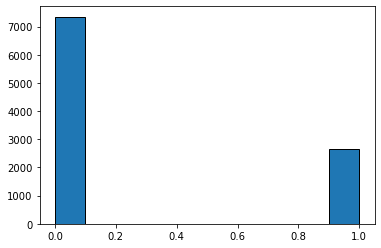

In [13]:
# Generating univariate visualizations
dfg.Churn_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

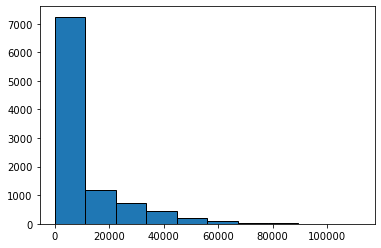

In [41]:
dfg.Population.hist(edgecolor='black', grid=0)

<AxesSubplot:>

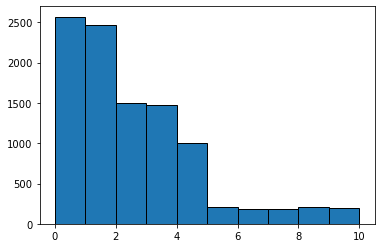

In [42]:
dfg.Children.hist(edgecolor='black', grid=0)

<AxesSubplot:>

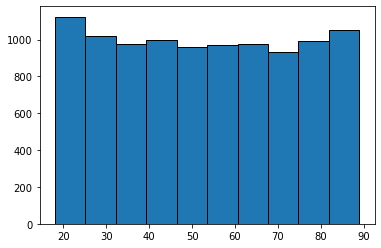

In [43]:
dfg.Age.hist(edgecolor='black', grid=0)

<AxesSubplot:>

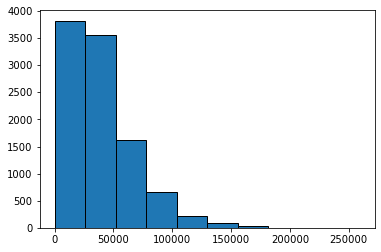

In [44]:
dfg.Income.hist(edgecolor='black', grid=0)

<AxesSubplot:>

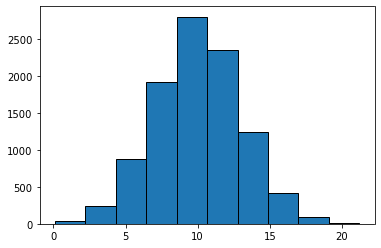

In [45]:
dfg.Outage_sec_perweek.hist(edgecolor='black', grid=0)

<AxesSubplot:>

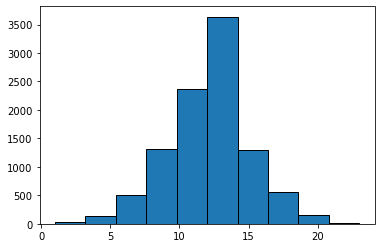

In [46]:
dfg.Email.hist(edgecolor='black', grid=0)

<AxesSubplot:>

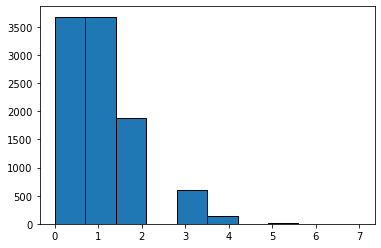

In [47]:
dfg.Contacts.hist(edgecolor='black', grid=0)

<AxesSubplot:>

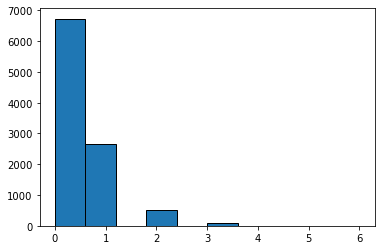

In [48]:
dfg.Yearly_equip_failure.hist(edgecolor='black', grid=0)

<AxesSubplot:>

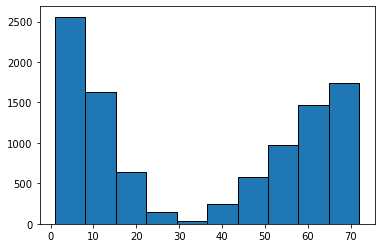

In [14]:
dfg.Tenure.hist(edgecolor='black', grid=0)

<AxesSubplot:>

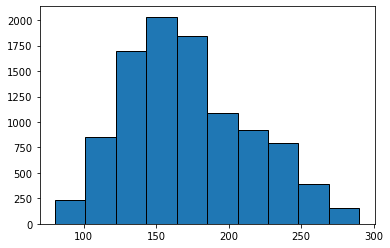

In [49]:
dfg.MonthlyCharge.hist(edgecolor='black', grid=0)

<AxesSubplot:>

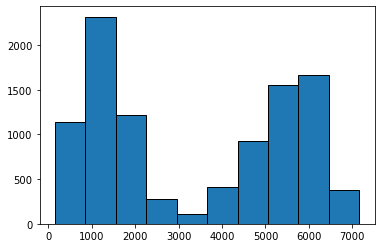

In [50]:
dfg.Bandwidth_GB_Year.hist(edgecolor='black', grid=0)

<AxesSubplot:>

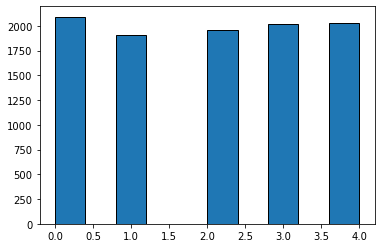

In [51]:
dfg.Marital_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

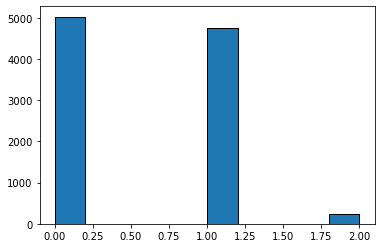

In [52]:
dfg.Gender_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

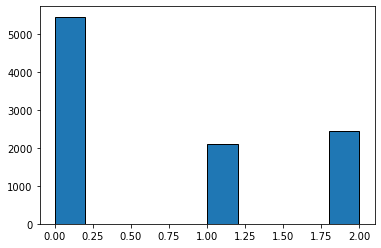

In [53]:
dfg.Contract_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

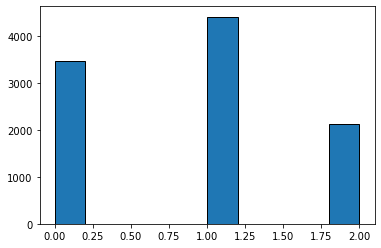

In [54]:
dfg.InternetService_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

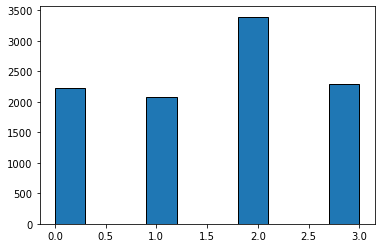

In [55]:
dfg.PaymentMethod_numeric.hist(edgecolor='black', grid=0)

<AxesSubplot:>

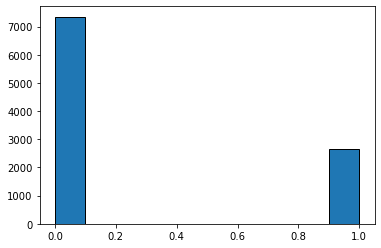

In [56]:
dfg.Churn_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

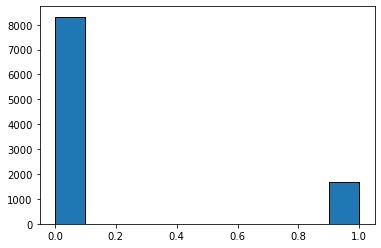

In [57]:
dfg.Techie_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

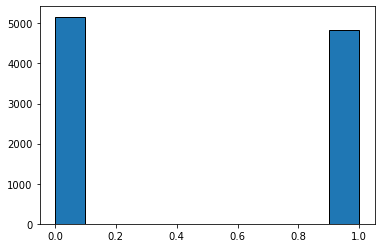

In [58]:
dfg.Port_modem_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

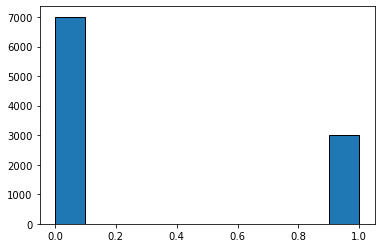

In [59]:
dfg.Tablet_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

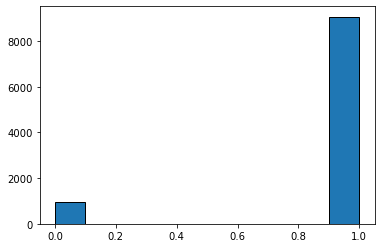

In [60]:
dfg.Phone_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

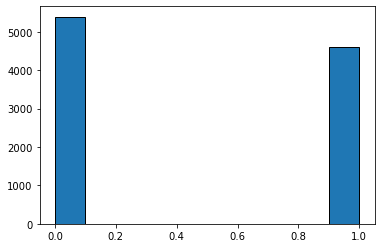

In [61]:
dfg.Multiple_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

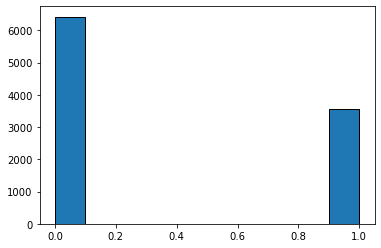

In [62]:
dfg.OnlineSecurity_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

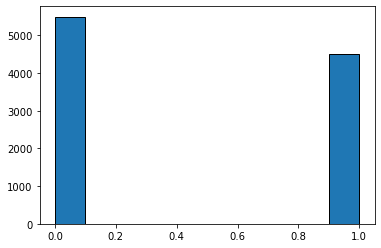

In [63]:
dfg.OnlineBackup_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

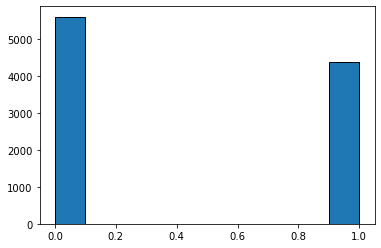

In [64]:
dfg.DeviceProtection_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

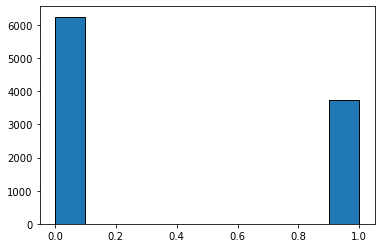

In [65]:
dfg.TechSupport_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

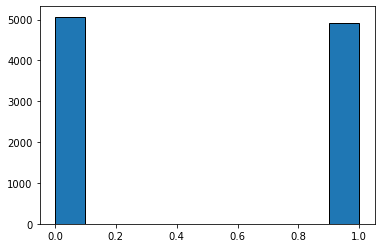

In [66]:
dfg.StreamingTV_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

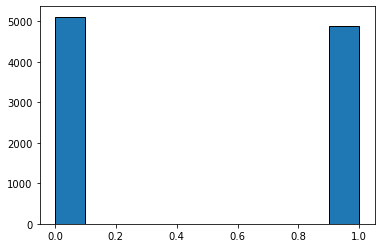

In [67]:
dfg.StreamingMovies_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:>

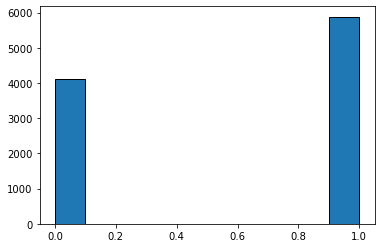

In [68]:
dfg.PaperlessBilling_Yes.hist(edgecolor='black', grid=0)

<AxesSubplot:xlabel='Churn_Yes', ylabel='Population'>

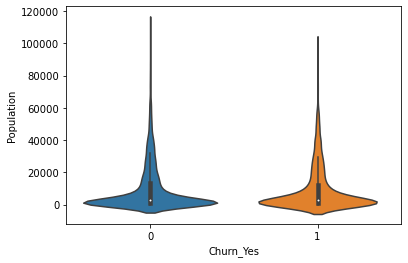

In [23]:
# Generating bivariate visualization using 'Churn'
sns.violinplot(data=dfg, x="Churn_Yes", y="Population")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Children'>

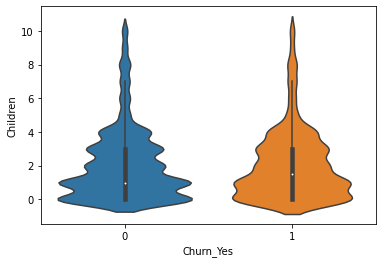

In [22]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Children")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Age'>

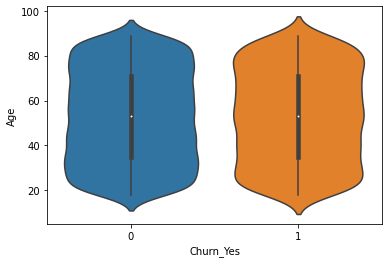

In [24]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Age")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Income'>

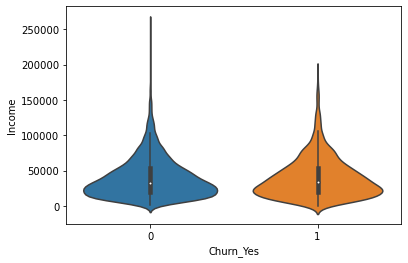

In [25]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Income")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Outage_sec_perweek'>

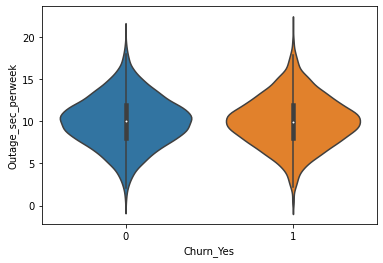

In [28]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Outage_sec_perweek")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Email'>

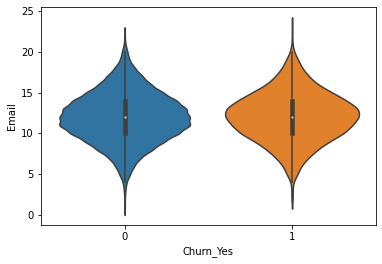

In [29]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Email")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Contacts'>

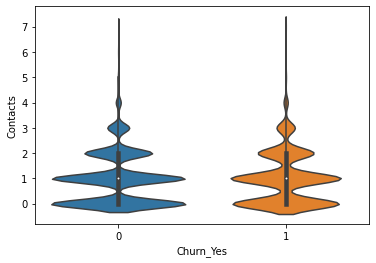

In [30]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Contacts")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Yearly_equip_failure'>

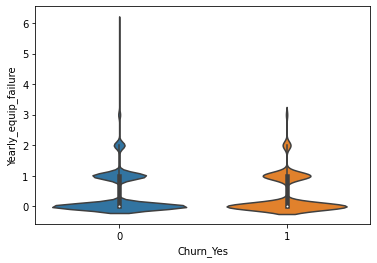

In [31]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Yearly_equip_failure")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Tenure'>

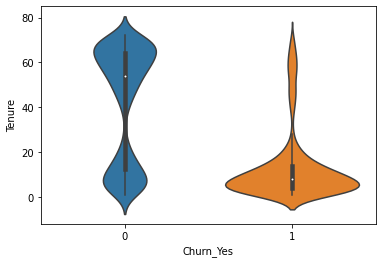

In [32]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Tenure")

<AxesSubplot:xlabel='Churn_Yes', ylabel='MonthlyCharge'>

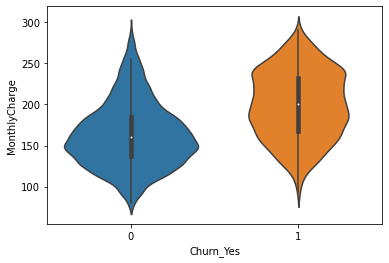

In [33]:
sns.violinplot(data=dfg, x="Churn_Yes", y="MonthlyCharge")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Marital_numeric'>

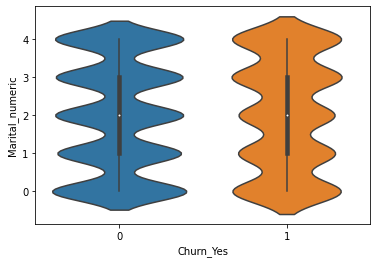

In [34]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Marital_numeric")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Gender_numeric'>

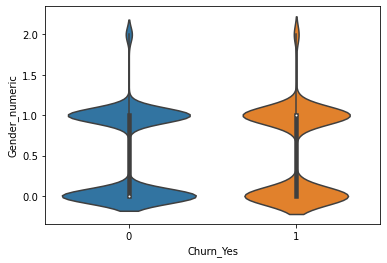

In [35]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Gender_numeric")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Contract_numeric'>

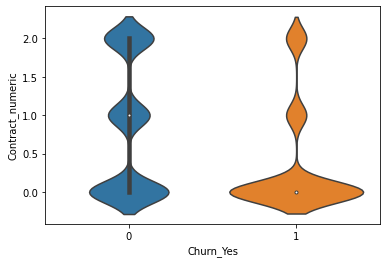

In [36]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Contract_numeric")

<AxesSubplot:xlabel='Churn_Yes', ylabel='InternetService_numeric'>

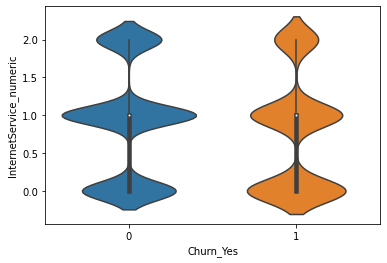

In [37]:
sns.violinplot(data=dfg, x="Churn_Yes", y="InternetService_numeric")

<AxesSubplot:xlabel='Churn_Yes', ylabel='PaymentMethod_numeric'>

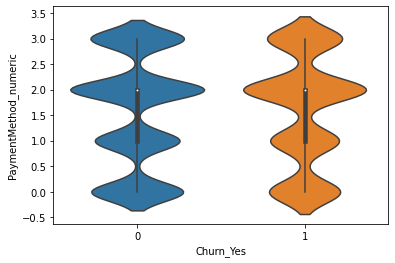

In [38]:
sns.violinplot(data=dfg, x="Churn_Yes", y="PaymentMethod_numeric")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Techie_Yes'>

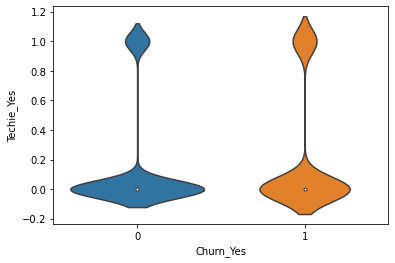

In [39]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Techie_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Port_modem_Yes'>

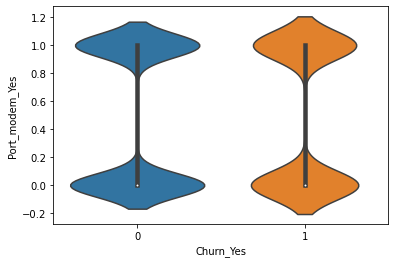

In [40]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Port_modem_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Tablet_Yes'>

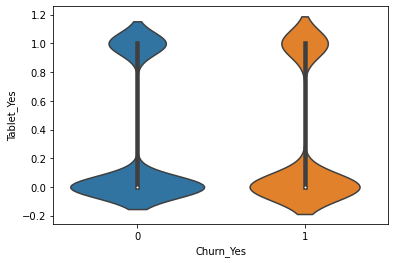

In [41]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Tablet_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Phone_Yes'>

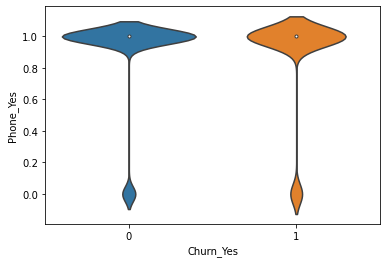

In [42]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Phone_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='Multiple_Yes'>

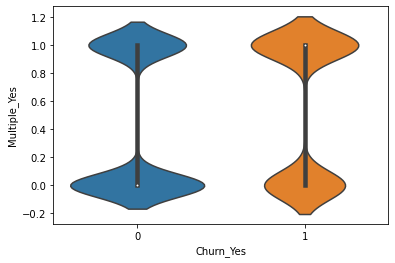

In [43]:
sns.violinplot(data=dfg, x="Churn_Yes", y="Multiple_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='OnlineSecurity_Yes'>

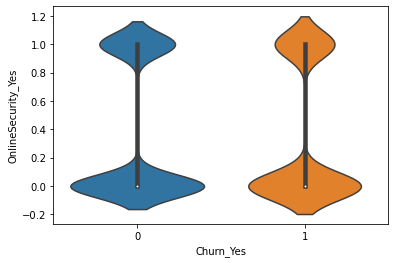

In [44]:
sns.violinplot(data=dfg, x="Churn_Yes", y="OnlineSecurity_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='OnlineBackup_Yes'>

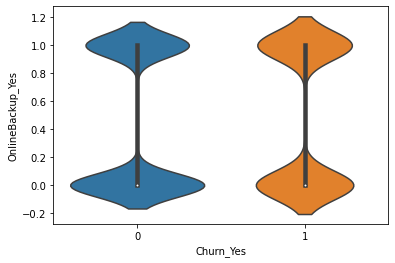

In [45]:
sns.violinplot(data=dfg, x="Churn_Yes", y="OnlineBackup_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='DeviceProtection_Yes'>

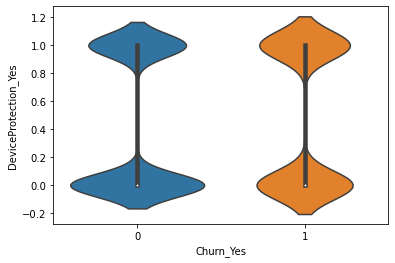

In [46]:
sns.violinplot(data=dfg, x="Churn_Yes", y="DeviceProtection_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='TechSupport_Yes'>

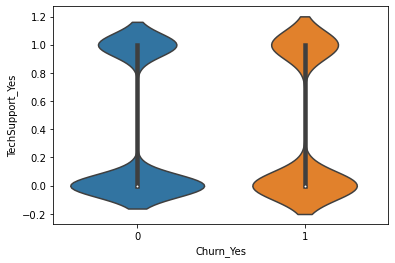

In [47]:
sns.violinplot(data=dfg, x="Churn_Yes", y="TechSupport_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='StreamingTV_Yes'>

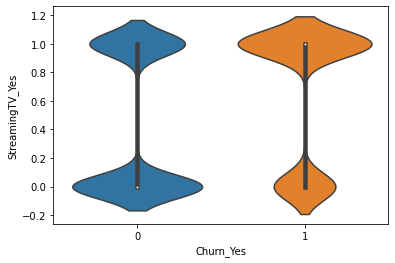

In [48]:
sns.violinplot(data=dfg, x="Churn_Yes", y="StreamingTV_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='StreamingMovies_Yes'>

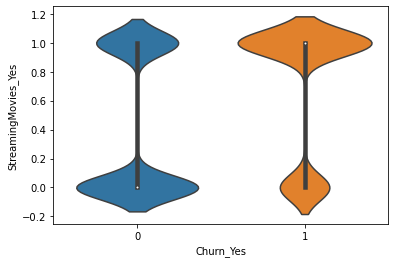

In [49]:
sns.violinplot(data=dfg, x="Churn_Yes", y="StreamingMovies_Yes")

<AxesSubplot:xlabel='Churn_Yes', ylabel='PaperlessBilling_Yes'>

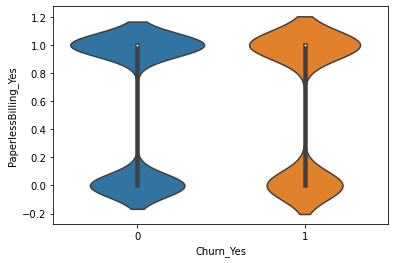

In [50]:
sns.violinplot(data=dfg, x="Churn_Yes", y="PaperlessBilling_Yes")

<AxesSubplot:title={'center':'Correlation with Target'}>

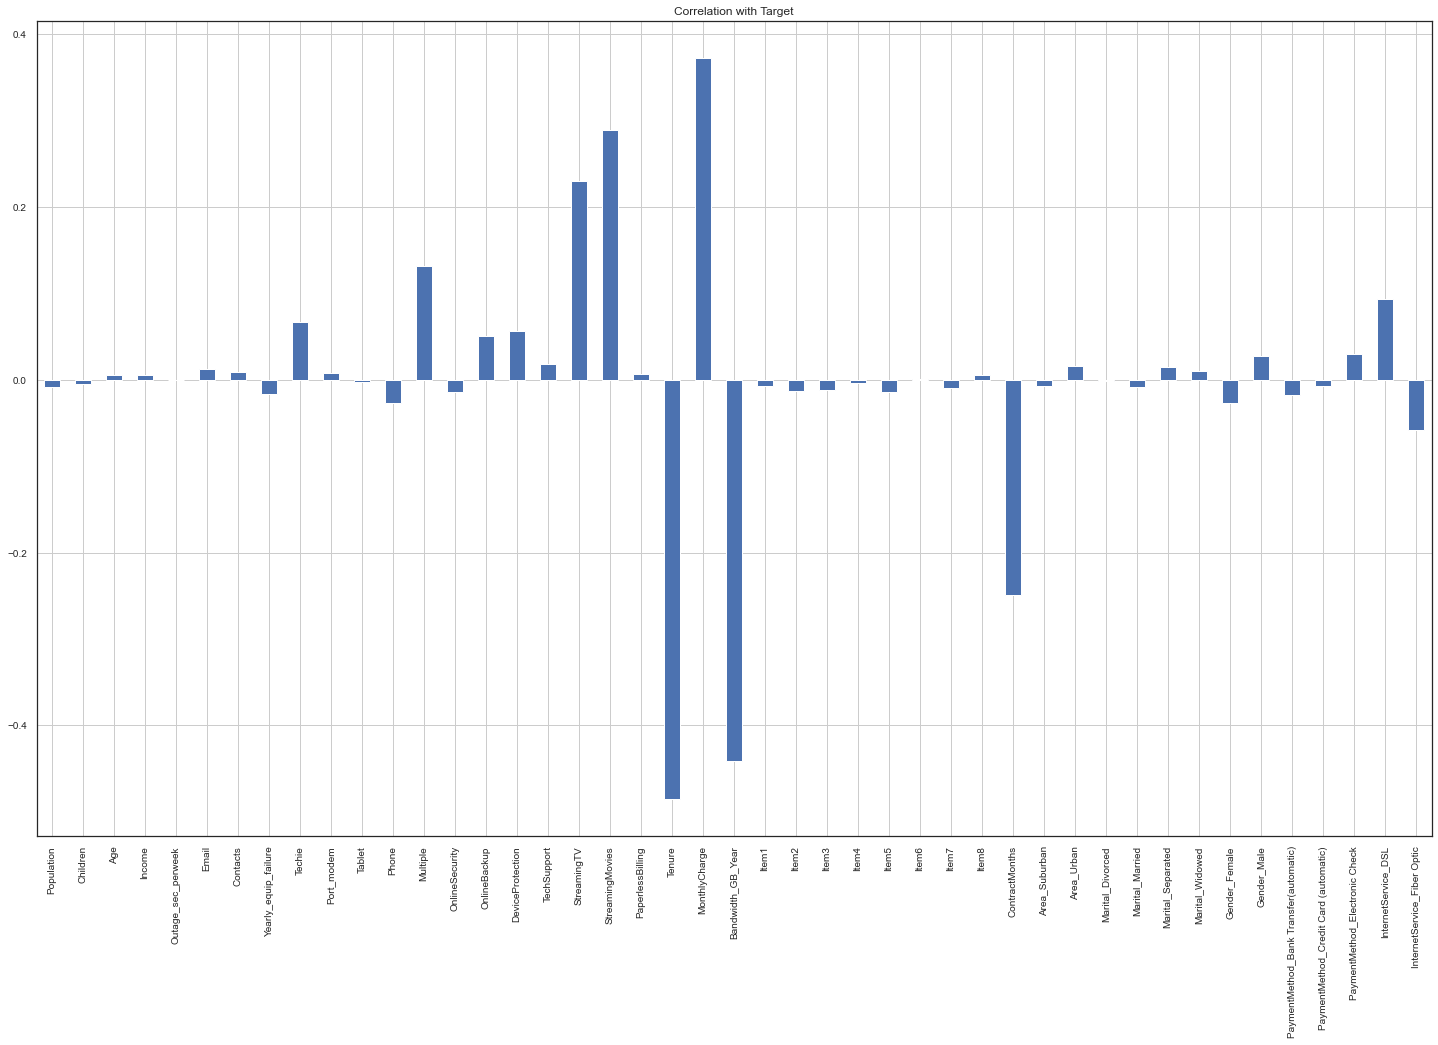

In [102]:
Xg.corrwith(df.Churn).plot.bar(figsize = (25,15), title = "Correlation with Target", fontsize = 10,grid = True)

<AxesSubplot:>

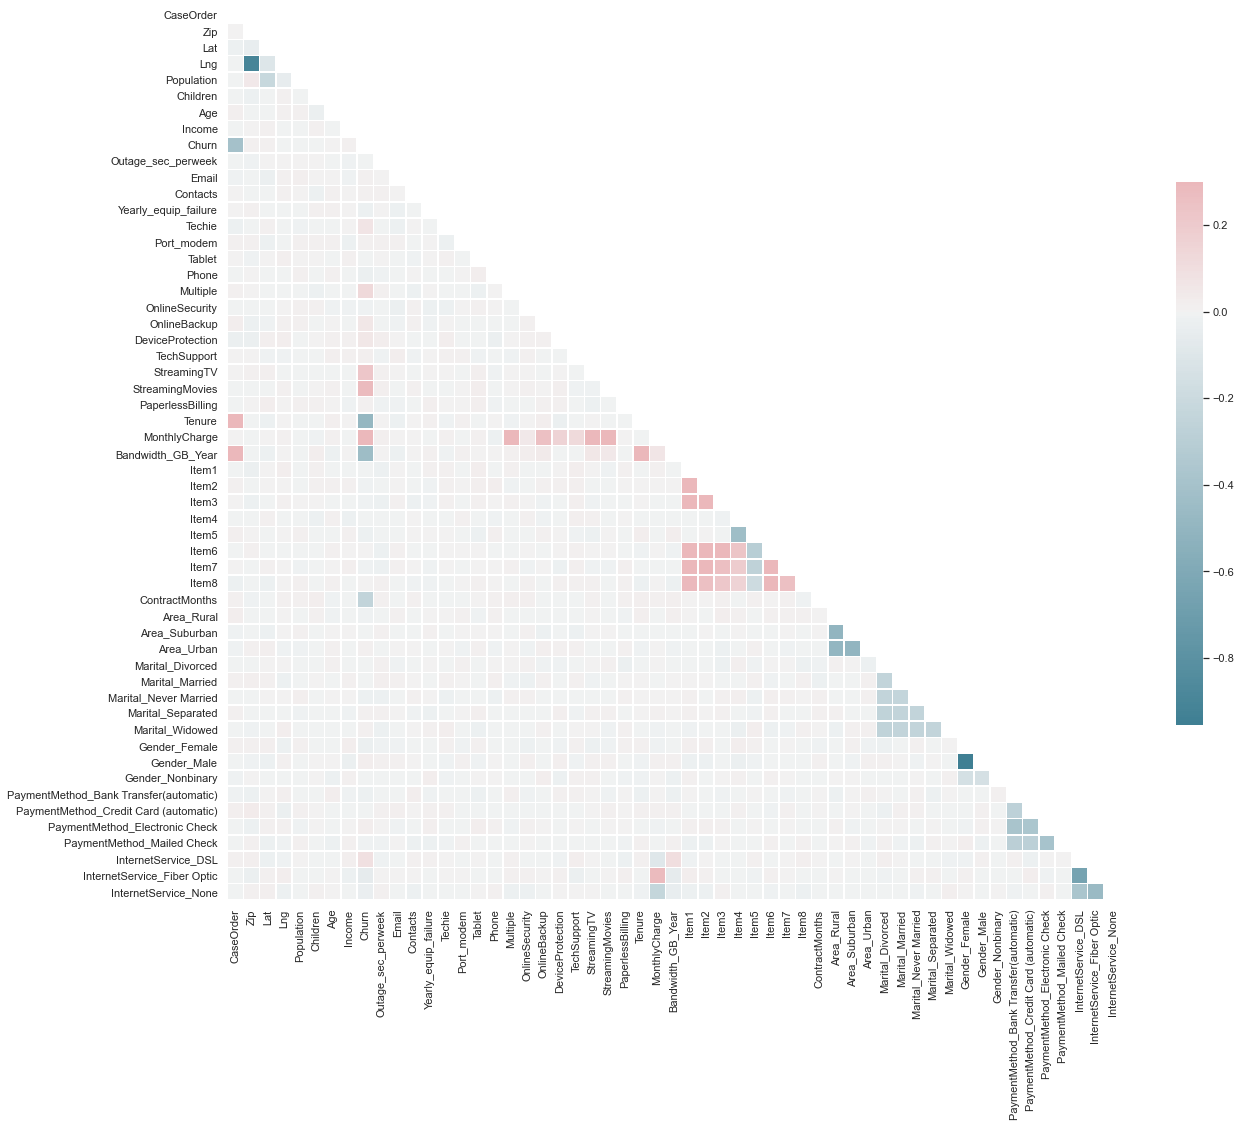

In [76]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
# Create gross dataframe by dropping unusable variables and altered categorical columns
dfg = df.drop(columns=['Interaction', 'CaseOrder', 'Customer_id', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod',
                       'Area_Rural', 'Marital_Never Married', 'Gender_Nonbinary', 'PaymentMethod_Mailed Check', 'InternetService_None'])
print(dfg.shape)
dfg.dtypes

(10000, 46)


Population                                  int64
Children                                    int64
Age                                         int64
Income                                    float64
Churn                                       int64
Outage_sec_perweek                        float64
Email                                       int64
Contacts                                    int64
Yearly_equip_failure                        int64
Techie                                      int64
Port_modem                                  int64
Tablet                                      int64
Phone                                       int64
Multiple                                    int64
OnlineSecurity                              int64
OnlineBackup                                int64
DeviceProtection                            int64
TechSupport                                 int64
StreamingTV                                 int64
StreamingMovies                             int64


In [8]:
# Saving the cleaned set to .csv
dfg.to_csv("data\churn_cleaned.csv", index = False)

In [50]:
pd.set_option('display.max_columns', None)
dfg.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,ContractMonths,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,InternetService_DSL,InternetService_Fiber Optic
0,38,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,12,0,1,0,0,0,1,0,1,0,1,0,0,1
1,10446,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,3735,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,24,0,1,0,0,0,1,1,0,0,1,0,1,0
3,13863,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,24,1,0,0,1,0,0,0,1,0,0,0,1,0
4,11352,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,1,1,0,0,0,1,0,0,1,0,0,0,0,1


In [94]:
# Creating gross regression set
Xg = dfg.drop(columns=['Churn'])
yg = dfg['Churn']
print(Xg.shape)

(10000, 45)


In [95]:
# Running the gross model
logit_model = sm.Logit(yg,Xg)
gross = logit_model.fit()
print(gross.summary2())

Optimization terminated successfully.
         Current function value: 0.232808
         Iterations 9
                                    Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.597    
Dependent Variable:          Churn                   AIC:                     4746.1570
Date:                        2021-09-02 16:45        BIC:                     5070.6223
No. Observations:            10000                   Log-Likelihood:          -2328.1  
Df Model:                    44                      LL-Null:                 -5782.2  
Df Residuals:                9955                    LLR p-value:             0.0000   
Converged:                   1.0000                  Scale:                   1.0000   
No. Iterations:              9.0000                                                    
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.

In [96]:
# Removing variables where P > .05
Xr = Xg.drop(columns=['Population', 'Income', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Port_modem', 'Tablet', 'StreamingTV', 'PaperlessBilling',
                      'Item1', 'Item2', 'Item3', 'Item6', 'Item7', 'Item8', 'Area_Suburban', 'Area_Urban', 'Marital_Divorced', 'Marital_Married',
                      'Marital_Separated', 'Marital_Widowed'])
yr = yg
print(Xr.shape)

(10000, 24)


In [97]:
# Checking for multicollinearity in Xr
vif_data = pd.DataFrame()
vif_data["feature"] = Xr.columns
vif_data["VIF"] = [variance_inflation_factor(Xr.values, i)
                          for i in range(len(Xr.columns))]
print(vif_data)

                                   feature           VIF
0                                 Children     11.459608
1                                      Age     53.445758
2                                    Email     15.731557
3                                   Techie      1.204056
4                                    Phone     10.271140
5                                 Multiple      6.825263
6                           OnlineSecurity      3.133627
7                             OnlineBackup      2.392885
8                         DeviceProtection      2.196156
9                              TechSupport      3.182725
10                         StreamingMovies      5.319938
11                                  Tenure  15088.496781
12                           MonthlyCharge    907.152939
13                       Bandwidth_GB_Year  19377.071547
14                                   Item4     13.793836
15                                   Item5     13.867987
16                          Con

In [98]:
# Dropping variables with VIF > 10
Xr = Xr.drop(columns=['Children', 'Age', 'Email', 'Phone', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item4', 'Item5',
                      'Gender_Female', 'Gender_Male', 'InternetService_DSL', 'InternetService_Fiber Optic'])

In [99]:
# Constructing the reduced model using the selected predictors
logit_model = sm.Logit(yr,Xr)
reduced = logit_model.fit()
print(reduced.summary2())

Optimization terminated successfully.
         Current function value: 0.516699
         Iterations 6
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.106      
Dependent Variable:        Churn                   AIC:                     10355.9783 
Date:                      2021-09-02 16:46        BIC:                     10435.2920 
No. Observations:          10000                   Log-Likelihood:          -5167.0    
Df Model:                  10                      LL-Null:                 -5782.2    
Df Residuals:              9989                    LLR p-value:             3.8650e-258
Converged:                 1.0000                  Scale:                   1.0000     
No. Iterations:            6.0000                                                      
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.

In [134]:
# Confusion matrix
classifier = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')
classifier.fit(Xr, yr)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [112]:
ypred = classifier.predict(Xr)
acc = accuracy_score(yr,ypred)
prec = precision_score(yr, ypred)
rec = recall_score(yr, ypred)
f1 = f1_score(yr,ypred)
results = pd.DataFrame([['Logistic Regression (Lasso)', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso),0.7595,0.580433,0.333585,0.423676


Test Data Accuracy: 0.7595


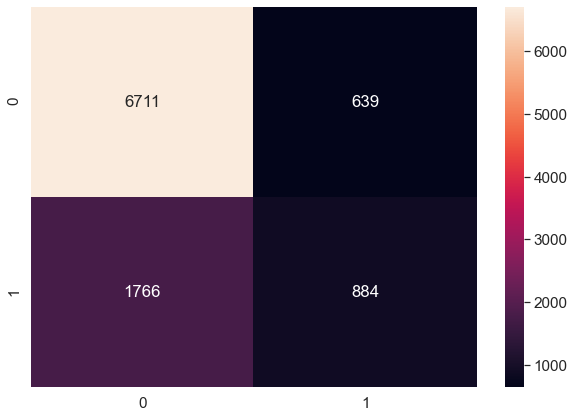

In [113]:
cm = confusion_matrix(yr, ypred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(yr, ypred)) 